In [1]:
# Cette ligne de code indique à Jupyter d'imprimer les graphiques directement dans la sortie de la cellule
%matplotlib inline
import seaborn # Rend les graphiques plus attractifs
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 4.0) # Determine la taille des graphiques (10 de longeur, 4 de largeur)

import pandas # importe le module "pandas" pour la manipulation de données

# Exercice: Achetons des voitures!

Nous allons utiliser un jeux de données très intéréssant contenant le prix de ventes de voitures d'occasion publiés dans le site Ebay allemand. (https://www.kaggle.com/orgesleka/used-cars-database).

Mettez vous à la place d'un acheteur, vendeur, ou commerciale... __A quelles questions voudriez-vous une réponse?__ 

#### Commençons déjà par importer le jeux de données!

In [7]:
# importer le dataset
# L'encoding est pour afficher des caractères allemands
cars = pandas.read_csv("../datasets/autos.csv", encoding="cp850") 

In [8]:
# head, pour afficher l'entête de la table
cars.head()

,name,price,type,year,gearbox,power,model,kilometer,fuel,brand,damaged
0,A5_Sportback_2.7_Tdi,18300,coupe,2011,manual,190,NaN,125000,diesel,audi,yes
1,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,auto,163,grand,125000,diesel,jeep,NaN
2,GOLF_4_1_4__3T?RER,1500,small,2001,manual,75,golf,150000,gasoline,volkswagen,no
3,Skoda_Fabia_1.4_TDI_PD_Classic,3600,small,2008,manual,69,fabia,90000,diesel,skoda,no
4,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manual,102,3er,150000,gasoline,bmw,yes


Chaque ligne (observation) correspond à une voiture mise en vente, et chaque colonne (variable) donne une des informations suivantes sur la voiture:

* __name__ : nom détaillé de la voiture
* __price__ : le prix affiché dans l'annonce
* __type__ : le type de voiture (berline, citadine, van, ...)
* __year__ : année dans laquelle la voiture a été enregistré
* __gearbox__ : type de boîte (manuelle/automatique)
* __power__ : puissance de la voiture en PS (presque équivalent à "horsepower")
* __model__ : nom du model de la voiture
* __kilometer__ : combien de kilometres a roulé la voiture
* __fuel__ : type de combustible
* __brand__ : marque
* __damaged__ : "Yes" si la voiture a été endommagé, et mise en cente sans avoir été reparée

## Description du dataset

L'étape primordiale avant tout analyse, est de bien connaitre le jeux de données à notre disposition. La liste ci-dessous, est une liste non exhaustive de questions à se poser lorsqu'on explore un nouveau jeux de données.

A vous de les repondre avec Python!

<div class="alert alert-info">
**Question 1.a** Combien d'annonces ont été réalisés sur Ebay? c'est-à-dire, quelle est le nombre de lignes du jeux de données?
</div>

In [9]:
# Votre réponse ici!


In [10]:
cars.shape # 314 467

(314467, 11)

<div class="alert alert-info">
**Question 1.b** Quelles sont les variables catégorielles et numériques?
</div>

In [11]:
# Votre réponse ici!


In [12]:
cars.info()

# name, type, gearbox, model, fuel, brand, damaged ==> objects (catégorielle)
# price, year, power, kilometer ==> int64 (numérique)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314467 entries, 0 to 314466
Data columns (total 11 columns):
name         314467 non-null object
price        314467 non-null int64
type         293536 non-null object
year         314467 non-null int64
gearbox      308641 non-null object
power        314467 non-null int64
model        302650 non-null object
kilometer    314467 non-null int64
fuel         295196 non-null object
brand        314467 non-null object
damaged      268159 non-null object
dtypes: int64(4), object(7)
memory usage: 26.4+ MB


<div class="alert alert-info">
**Question 1.c** Affichez la description (méthode `.describe()`) du dataset pour avoir une vision globale. Qu'est-ce que vous constatez?
</div>

In [13]:
# Votre réponse ici!


In [14]:
cars.describe()
# seulement variables numériques. 
# Moyenne du prix elevé (17K), 
# Des voitures de l'année 2019?

,price,year,power,kilometer
count,314467.000000,314467.000000,314467.000000,314467.000000
mean,5633.103051,2003.866151,124.135181,126676.630616
std,6091.348498,6.398420,56.693121,38196.901630
min,101.000000,1981.000000,21.000000,5000.000000
25%,1400.000000,1999.000000,80.000000,125000.000000
50%,3390.000000,2004.000000,116.000000,150000.000000
75%,7650.000000,2008.000000,150.000000,150000.000000
max,35099.000000,2019.000000,490.000000,150000.000000


<div class="alert alert-info">
**Question 1.d** Vérifiez votre compréhension sur la signification des variables. Affichez les valeurs uniques pour les variables `type`, `fuel` et `brand`.
</div>

In [15]:
# Votre réponse ici!


In [16]:
print("Type: ", cars.type.unique())
print("Fuel: ", cars.fuel.unique())
print("Brand: ", cars.brand.unique())

Type:  ['coupe' 'suv' 'small' 'limousine' 'convertible' 'bus' 'van' nan 'other']
Fuel:  ['diesel' 'gasoline' nan 'lpg' 'other' 'hybrid' 'cng' 'electric']
Brand:  ['audi' 'jeep' 'volkswagen' 'skoda' 'bmw' 'peugeot' 'ford' 'mazda'
 'nissan' 'renault' 'mercedes_benz' 'opel' 'seat' 'citroen' 'honda' 'fiat'
 'mini' 'smart' 'hyundai' 'alfa_romeo' 'subaru' 'volvo' 'mitsubishi' 'kia'
 'suzuki' 'lancia' 'porsche' 'toyota' 'chevrolet' 'dacia' 'daihatsu'
 'chrysler' 'sonstige_autos' 'jaguar' 'daewoo' 'rover' 'saab' 'land_rover'
 'trabant' 'lada']


## Exploration des caractéristiques des annonces
Très bien! Maintenant que nous avons une idée plus concrete du contenu des données, passons à des choses sérieuses.


<div class="alert alert-info">
**Question 2.a** En tant qu'acheteurs, le plus souvent la première question qu'on se pose est sur le prix des voitures. Avec la question 1.c nous avons déjà une idée des prix. <br><br> __Affichez__ la distribution de cette variable sous forme d'histogramme. Qu'est-ce que vous constatez? 
</div>

In [17]:
# Votre réponse ici!


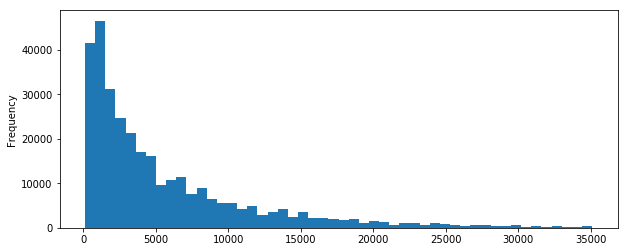

In [18]:
cars.price.plot.hist(bins=50)

<div class="alert alert-info">
**Question 2.b** On sait que le prix d'une voiture est très dépendant de beaucoup de facteurs. La puissance en est un parmi ceux là. __Comment varie le prix en fonction de la puissance de la voiture?__
<br><br>
Utilisez un graphique de type __scatterplot__ pour ce faire! (le paramètre `alpha` peut être très utile pour ajouter de la transparence)
</div>

Exemple:
```python
nom_dataframe.plot.scatter(x = "nom_colonne", # variable x
                           y = "nom_colonne", # variable y
                           alpha = 0.01 # transparence (entre 0 et 1)
                           ); 
```


In [19]:
# Votre réponse ici!


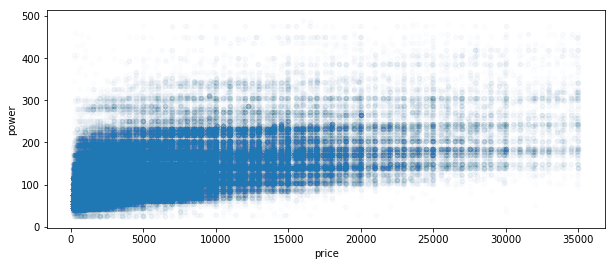

In [20]:
cars.plot.scatter(x="price", y="power", alpha=0.01)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'linear model of price vs power')

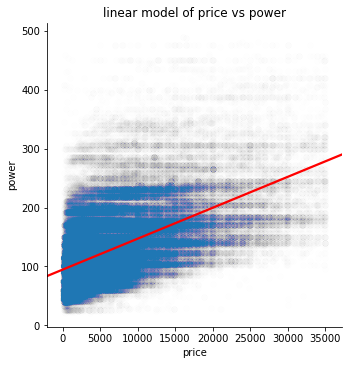

In [21]:
seaborn.lmplot(data = cars, 
               x="price", 
               y = "power", 
               scatter_kws={'alpha':0.005}, 
               line_kws={'color': 'red'})
plt.title("linear model of price vs power")

### Comment choisir sa voiture au meilleur prix?

<div class="alert alert-info">
**Question 3.a** En plus de la puissance, __l'age__ est un de facteurs les plus influents sur le prix. Comment évolue __la distribution du prix__ des voitures en fonction de l'age? <br>__Tracez un boxplot__ du prix par année, et analysez le résultat.
</div>

Exemple:
```python
nom_dataframe.boxplot(column = "nom_colonne", # variable à afficher la distribution
                          by = "nom_colonne", # un boxplot est fait par valeur unique de la colonne
                           ); 
```


In [22]:
# Votre réponse ici!


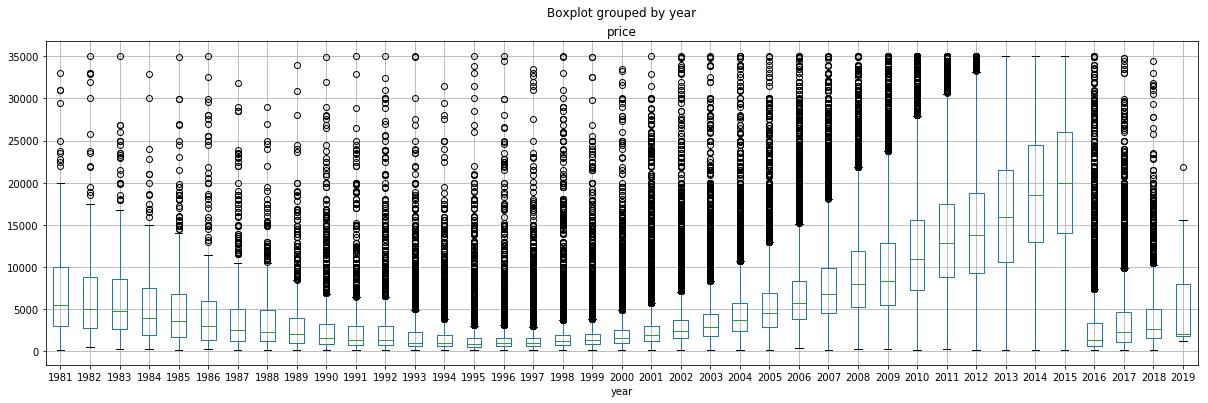

In [23]:
cars.boxplot(by="year", column="price", figsize=(20,6));

<div class="alert alert-info">
**Question 3.b** Le type de voiture peut autre aussi un facteur determinant du prix. 
<br><br>
Quel __type de véhicule__ vous devriez préférer à l'achat pour un prix abordable?
</div>

In [24]:
# Votre réponse ici!


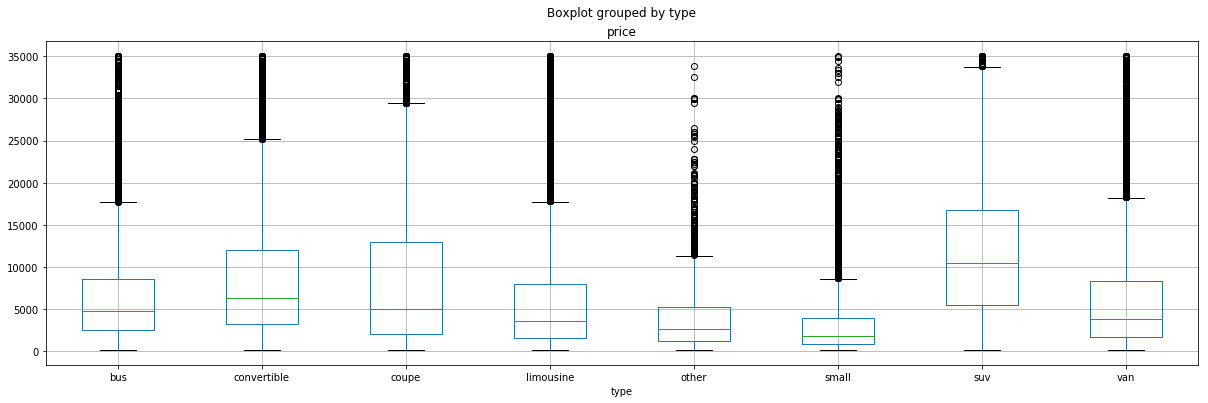

In [25]:
cars.boxplot(by="type", column="price", figsize=(20,6));
# Les véhicules de catégorie small

Mais le type du véhicule n'est pas tout! __Qu'est-ce qu'on peut dire par rapport à la pollution de la voiture?__ 

On sait que certains types de moteurs entraineront des frais plus importants à l'usage dû au prix du combustible, mais les voitures les plus "propres" seront plus chères à l'achat. 
<div class="alert alert-info">
**Question 3.c**
Combien doit on payer en plus (ou en moins) en moyenne quand on achète un véhicule electrique (ou hybride) par rapport à un véhicule en essence? 
<br>
Pourquoi pensez-vous qu'un tel écart a lieu? la réalité? ou notre jeux de données?
</div>


In [26]:
# Votre reponse ici!